In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics

In [2]:
df = pd.read_csv('loan.csv')

/home/rahulg/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Summary
**Advice from Course Instructor**
- Pick either of the columns: loan-amt or funded-amnt invested to study the data
- 
**To Check**
- What is the column telling about default or probability of default? 

**Ideas**
- There can be multiple ids for the same member_id


**Some Ideas for Univariate Analysis**
- You can check which rows are different for funded_amnt and loan_amnt : this tells when Bank decided to reduce loan
- acc_now_delinq: no of accounts in which the member is delinquent / not paying
- annual_inc: We want to see effect of annual income on repaying the loan
- annual_inc_joint, dti
- application_type
- avg_cur_bal
- bc_util
- delinq_2yrs
- delinq_amnt, emp_length, 
- 

### Data Understanding

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
df.shape

(39717, 111)

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
#Checking the percentage of the null values
df.loc[:,df.isnull().sum()/len(df.index)*100>90].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   mths_since_last_record          2786 non-null   float64
 1   next_pymnt_d                    1140 non-null   object 
 2   mths_since_last_major_derog     0 non-null      float64
 3   annual_inc_joint                0 non-null      float64
 4   dti_joint                       0 non-null      float64
 5   verification_status_joint       0 non-null      float64
 6   tot_coll_amt                    0 non-null      float64
 7   tot_cur_bal                     0 non-null      float64
 8   open_acc_6m                     0 non-null      float64
 9   open_il_6m                      0 non-null      float64
 10  open_il_12m                     0 non-null      float64
 11  open_il_24m                     0 non-null      float64
 12  mths_since_rcnt_il              

In [8]:
#Dropping the columns which are more than 90% Null
df= df.loc[:,~(df.isnull().sum()/len(df.index)*100>90)]

In [9]:
df.shape

(39717, 55)

In [10]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [11]:
df.isnull().sum()/len(df.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Among the remaining columns, mths_since_last_delinq has the highest nulls: 64%. Also it is a customer behaviour column. Hence, dropping this column.

In [12]:
df = df.drop('mths_since_last_delinq', axis=1)

In [13]:
df.shape

(39717, 54)

Among the remaining columns, desc has 32% nulls, and also is needed only if we do data mining. As this is outside the scope of the assignment, we are the dropping this column.

In [14]:
df = df.drop('desc', axis=1)

In [15]:
df.shape

(39717, 53)

In [16]:
df.isnull().sum()/len(df.index)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

**The following Columns can be dropped as they are customer behaviour columns:** url, delinq_2yrs, revol_bal, revol_util, earliest_cr_line, inq_last_6mths, pub_rec, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, last_pymnt_d, last_credit_pull_d 

**The following columns have not relevant data for our Exploratory Data Analysis:** 
recoveries, collection_recovery_fee, last_pymnt_amnt, collections_12_mths_ex_med, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens [8 columns]

In [17]:
df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [18]:
df = df.drop(['url', 'delinq_2yrs', 'revol_bal', 'revol_util', 'earliest_cr_line', 'inq_last_6mths', 'pub_rec', 'total_acc', 'initial_list_status','out_prncp', 'out_prncp_inv',  'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee','last_pymnt_d','last_credit_pull_d'], axis=1)

In [19]:
df.shape

(39717, 35)

In [20]:
df = df.drop(['recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],axis=1)

In [21]:
df.shape

(39717, 27)

In [22]:
df.isnull().sum()/len(df.index)*100

id                     0.000000
member_id              0.000000
loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.191303
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
pymnt_plan             0.000000
purpose                0.000000
title                  0.027696
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
open_acc               0.000000
policy_code            0.000000
application_type       0.000000
acc_now_delinq         0.000000
dtype: float64

funded_amnt, funded_amnt_inv,installment, 

**These are the final list of columns to consider for the analysis:**
1. id - Unique for each loan transaction,
2. loan_amnt - This is the loan amount requested by the borrower
3. term - Duration of loan

**Further Analysis of Columns**

**Removing the columns having the same values in all the rows**: These columns have been removed because they do not provide any useful information for analysis.<br>
The following columns have the same data for all rows: <br>
1. acc_now_delinq: all Zeros data
2. policy_code: all ones data
3. pymnt_plan: all data is 'n'
4. application_type: all data is INDIVIDUAL only

In [23]:
df = df.drop(['acc_now_delinq','policy_code','pymnt_plan', 'application_type'],axis=1)

In [24]:
df.shape

(39717, 23)

**Removing the columns which are not needed for the Exploratory data analysis:** 
1. member_id: This can be removed because we are considering 'id' instead (each transaction is considered unique)
2. funded_amnt & funded_amnt_inv: These can be removed because we are considering the amount the borrower has requested for the analysis (in the column 'loan_amnt')
3. title: This can be removed because we will be considering the column: 'purpose' for the exploratory data analysis as it is the non-null categorical data provided by the borrower to describe the purpose of the loan.

In [25]:
df = df.drop(['member_id','funded_amnt','funded_amnt_inv','title'],axis=1)

In [26]:
df.shape

(39717, 19)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_title            37258 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  zip_code             39717 non-null 

In [28]:
df.isnull().sum()/len(df.index)*100

id                     0.000000
loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.191303
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
open_acc               0.000000
dtype: float64

In [29]:
#df2 = pd.DataFrame[df['emp_title'].value_counts()]

In [30]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

**Removing the column: emp_title:** As there is 6% null data in this column, and the variable is distributed such that we are unable to derive any outcome from this. Hence, we are removing this column.

In [31]:
df = df.drop(['emp_title'],axis=1)

In [32]:
df.shape

(39717, 18)

In [33]:
df.isnull().sum()/len(df.index)*100

id                     0.00000
loan_amnt              0.00000
term                   0.00000
int_rate               0.00000
installment            0.00000
grade                  0.00000
sub_grade              0.00000
emp_length             2.70665
home_ownership         0.00000
annual_inc             0.00000
verification_status    0.00000
issue_d                0.00000
loan_status            0.00000
purpose                0.00000
zip_code               0.00000
addr_state             0.00000
dti                    0.00000
open_acc               0.00000
dtype: float64

In [34]:
df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

### Dealing with Null Values

In [35]:
df = df[~(df['emp_length'].isnull())]

In [36]:
df.isnull().sum()/len(df.index)*100

id                     0.0
loan_amnt              0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
zip_code               0.0
addr_state             0.0
dti                    0.0
open_acc               0.0
dtype: float64

In [37]:
df.shape

(38642, 18)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38642 non-null  int64  
 1   loan_amnt            38642 non-null  int64  
 2   term                 38642 non-null  object 
 3   int_rate             38642 non-null  object 
 4   installment          38642 non-null  float64
 5   grade                38642 non-null  object 
 6   sub_grade            38642 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       38642 non-null  object 
 9   annual_inc           38642 non-null  float64
 10  verification_status  38642 non-null  object 
 11  issue_d              38642 non-null  object 
 12  loan_status          38642 non-null  object 
 13  purpose              38642 non-null  object 
 14  zip_code             38642 non-null  object 
 15  addr_state           38642 non-null 

In [39]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,open_acc
0,1077501,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,3
1,1077430,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,3
2,1077175,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2
3,1076863,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,10
4,1075358,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,15


**Analysis to do**

**Checking the data counts of categorical columns**

**To Do** <br>
1. term - remove the months, and there should be no other values
3. interest_rate - remove percentage, and make float
6. emp_length - remove < and +
10. issue date - divide into month and year
11. loan status - change to 0 and 1 , and remove all rows with CURRENT

In [40]:
df['home_ownership'].value_counts()

RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [41]:
df['verification_status'].value_counts()

Not Verified       16498
Verified           12353
Source Verified     9791
Name: verification_status, dtype: int64

In [42]:
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

**To Decide**
1. Removing Other and None in home_ownership

<AxesSubplot:>

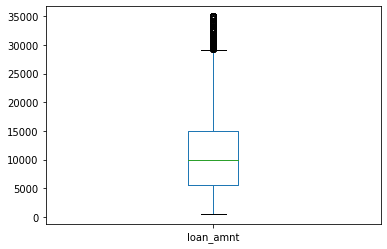

In [43]:
df["loan_amnt"].plot.box()

In [44]:
df.loc[df["loan_amnt"]>30000]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,open_acc
31,1069539,31825,36 months,7.90%,995.82,A,A4,5 years,MORTGAGE,75000.0,Verified,Dec-11,Fully Paid,debt_consolidation,080xx,NJ,14.03,12
80,1068994,35000,60 months,17.27%,551.84,D,D3,3 years,MORTGAGE,150000.0,Verified,Dec-11,Fully Paid,home_improvement,115xx,NY,7.51,11
128,1068159,35000,36 months,8.90%,1111.37,A,A5,6 years,MORTGAGE,125000.0,Verified,Dec-11,Fully Paid,debt_consolidation,928xx,CA,22.71,8
185,1067084,35000,36 months,10.65%,1140.07,B,B2,2 years,MORTGAGE,168000.0,Verified,Dec-11,Fully Paid,debt_consolidation,775xx,TX,3.17,16
268,1066155,35000,60 months,18.64%,690.56,E,E1,8 years,MORTGAGE,85000.0,Verified,Dec-11,Fully Paid,debt_consolidation,604xx,IL,12.00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19604,672680,35000,60 months,16.40%,858.59,E,E1,< 1 year,OWN,75000.0,Verified,Feb-11,Fully Paid,debt_consolidation,088xx,NJ,10.11,14
19740,670409,35000,60 months,18.99%,907.73,F,F3,10+ years,RENT,128000.0,Verified,Feb-11,Fully Paid,debt_consolidation,115xx,NY,12.27,7
19800,669297,32000,60 months,20.85%,863.01,G,G3,5 years,RENT,62400.0,Verified,Feb-11,Fully Paid,debt_consolidation,018xx,MA,13.04,4
19811,666337,32000,60 months,19.74%,843.19,F,F5,8 years,RENT,93500.0,Verified,Feb-11,Fully Paid,debt_consolidation,112xx,NY,16.36,10


<AxesSubplot:>

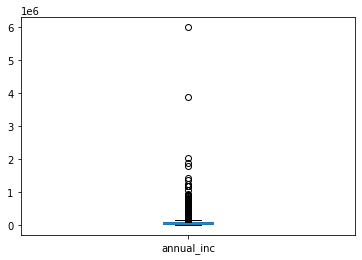

In [45]:
df["annual_inc"].plot.box()

<AxesSubplot:>

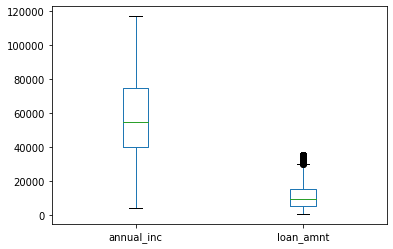

In [46]:
df.loc[df["annual_inc"]<=117000.0,["annual_inc","loan_amnt"]].plot.box()

In [47]:
#Removing outlier
df=df.loc[(df["annual_inc"]<=df["annual_inc"].quantile(0.99))]

<AxesSubplot:>

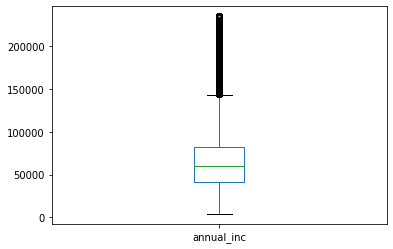

In [48]:
df.loc[:,["annual_inc"]].plot.box()

In [49]:
df.loc[(df["annual_inc"]>143975) &  (df["loan_status"]=='Charged Off')].shape

(162, 18)

In [50]:
df["annual_inc"].quantile(0.95)

135000.0

In [51]:
df.shape

(38257, 18)

In [52]:
1933/38642

0.050023290719942035

In [53]:
df["loan_status"].value_counts()

Fully Paid     31813
Charged Off     5360
Current         1084
Name: loan_status, dtype: int64

In [55]:
df["loan_status"].value_counts()

Fully Paid     31813
Charged Off     5360
Name: loan_status, dtype: int64

In [56]:
#To remove Current status and to update numerical values
df = df.loc[~(df["loan_status"]=='Current')]
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x=='Charged Off' else 0)

In [57]:
df["loan_status"].value_counts()

0    31813
1     5360
Name: loan_status, dtype: int64

In [61]:
pd.qcut(df['loan_amnt'], q=3).value_counts()

(499.999, 6500.0]     12450
(6500.0, 12000.0]     12362
(12000.0, 35000.0]    12361
Name: loan_amnt, dtype: int64